# Importing libraries, datasets and Basic EDA


In [96]:
+## Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [97]:
## Importing datasets

df_financial = pd.read_csv('/content/finanical_information.csv')
df_industry = pd.read_csv('/content/industry_client_details.csv')
df_payment = pd.read_csv('/content/payment_information.csv')
df_subscription = pd.read_csv('/content/subscription_information.csv')

In [98]:
## Checking for common columns

total_df = [df_financial, df_industry, df_payment, df_subscription]
for df in total_df:
  print(df.head(1))

   Unnamed: 0  start_date    end_date  inflation_rate  gdp_growth_rate
0           0  2018-01-01  2018-03-31            5.77             3.51
    client_id company_size         industry location
0  4280387012        Large  Finance Lending   Mumbai
    client_id payment_date  amount_paid payment_method
0  6292156167    9/16/2019        447.0  Bank Transfer
    client_id subscription_type  start_date    end_date  renewed
0  1131383004            Yearly  2020-11-11  2021-11-11    False


In [99]:
## Merging the datasets

df_merge = df_industry.set_index('client_id').join([df_subscription.set_index('client_id'),
                                                     df_payment.set_index('client_id')],
                                                    how='inner')
df_merge = df_merge.reset_index()

In [87]:
df_financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       21 non-null     int64         
 1   start_date       21 non-null     datetime64[ns]
 2   end_date         21 non-null     datetime64[ns]
 3   inflation_rate   21 non-null     float64       
 4   gdp_growth_rate  21 non-null     float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 972.0 bytes


In [102]:
## Checking for the null, data types and Shape of the datas

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   client_id          100 non-null    int64  
 1   company_size       100 non-null    object 
 2   industry           100 non-null    object 
 3   location           100 non-null    object 
 4   subscription_type  100 non-null    object 
 5   start_date         100 non-null    object 
 6   end_date           100 non-null    object 
 7   renewed            100 non-null    bool   
 8   payment_date       100 non-null    object 
 9   amount_paid        100 non-null    float64
 10  payment_method     100 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 8.0+ KB


In [103]:
## Converting the date time datas to proper data type

df_merge[['payment_date', 'start_date', 'end_date']] = df_merge[['payment_date', 'start_date', 'end_date']].apply(pd.to_datetime)
df_financial['end_date'] = pd.to_datetime(df_financial['end_date'])

In [106]:
## Cross verifying the data types

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   client_id          100 non-null    int64         
 1   company_size       100 non-null    object        
 2   industry           100 non-null    object        
 3   location           100 non-null    object        
 4   subscription_type  100 non-null    object        
 5   start_date         100 non-null    datetime64[ns]
 6   end_date           100 non-null    datetime64[ns]
 7   renewed            100 non-null    bool          
 8   payment_date       100 non-null    datetime64[ns]
 9   amount_paid        100 non-null    float64       
 10  payment_method     100 non-null    object        
dtypes: bool(1), datetime64[ns](3), float64(1), int64(1), object(5)
memory usage: 8.0+ KB


In [107]:
## displaying the Merged dataset

df_merge.head(2)

,client_id,company_size,industry,location,subscription_type,start_date,end_date,renewed,payment_date,amount_paid,payment_method
0,4280387012,Large,Finance Lending,Mumbai,Yearly,2022-11-25,2023-11-25,True,2022-11-25,77.1,Check
1,2095513148,Small,Finance Lending,Chennai,Monthly,2021-11-03,2021-12-03,False,2021-11-03,470.8,Check


In [108]:
## Creating a new column 'payment_year' by extracting the year from 'payment_date' for future analysis

df_merge['payment_year'] = df_merge['payment_date'].dt.year

In [109]:
## Converting the payment_year datatype

df_merge['payment_year'] = pd.to_datetime(df_merge['payment_date']).dt.to_period('Y')

In [110]:
## Cross verifying

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   client_id          100 non-null    int64         
 1   company_size       100 non-null    object        
 2   industry           100 non-null    object        
 3   location           100 non-null    object        
 4   subscription_type  100 non-null    object        
 5   start_date         100 non-null    datetime64[ns]
 6   end_date           100 non-null    datetime64[ns]
 7   renewed            100 non-null    bool          
 8   payment_date       100 non-null    datetime64[ns]
 9   amount_paid        100 non-null    float64       
 10  payment_method     100 non-null    object        
 11  payment_year       100 non-null    period[Y-DEC] 
dtypes: bool(1), datetime64[ns](3), float64(1), int64(1), object(5), period[Y-DEC](1)
memory usage: 8.8+ KB


# Getting into solving questions

### 1. How many finance lending and blockchain clients does the organization have?

In [113]:
## Filter the dataframe 'df_merge' to include only rows where the 'industry' column has values 'Finance Lending' or 'Block Chain'
finance_blockchain_clients = df_merge[df_merge['industry'].isin(['Finance Lending', 'Block Chain'])]

## Count the number of unique 'client_id' values in the filtered dataframe
finance_blockchain_clients_count = finance_blockchain_clients['client_id'].nunique()

## Print the count of unique clients in the 'Finance Lending' and 'Block Chain' industries
print("finance_blockchain_clients_count : ", finance_blockchain_clients_count)

finance_blockchain_clients_count :  47


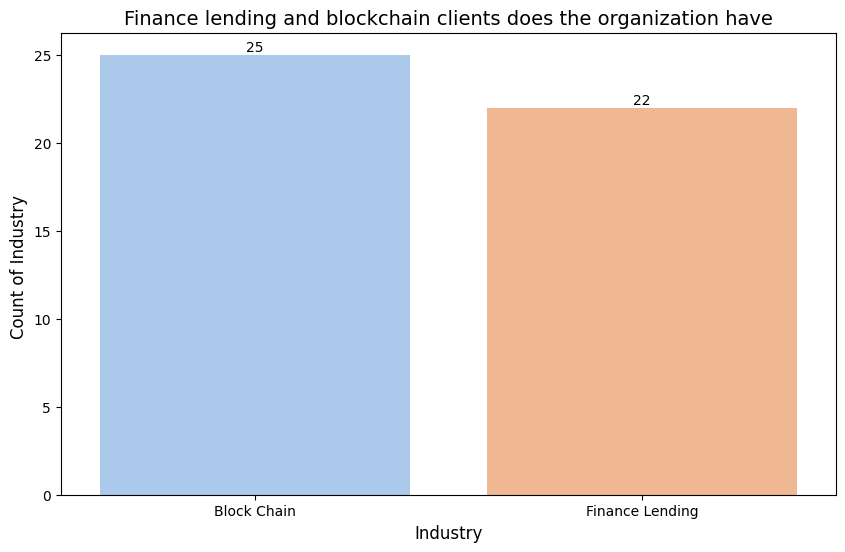

In [122]:
## Assigning the size of the image for standardizing same size of the image
plt.figure(figsize=(10, 6))

## Getting the count of each unique value in the 'industry' column This counts how many clients belong to each industry (either 'Finance Lending' or 'Block Chain')
finance_blockchain_value_count = finance_blockchain_clients['industry'].value_counts()

## Creating a bar plot using Seaborn
finance_blockchain_clients_plot = sns.barplot(x = finance_blockchain_value_count.index, y = finance_blockchain_value_count.values, palette='pastel')

## Looping through the containers (bars) in the plot and add labels on top of each bar The 'bar_label' method adds the value labels, displaying the client count on top of each bar
for cointer in finance_blockchain_clients_plot.containers:
  finance_blockchain_clients_plot.bar_label(cointer, fontsize=10)

## Adding titles and labels
plt.title('Finance lending and blockchain clients does the organization have', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Count of Industry ', fontsize=12)

## Displaying plot
plt.show()


### 2. Which industry in the organization has the highest renewal rate?

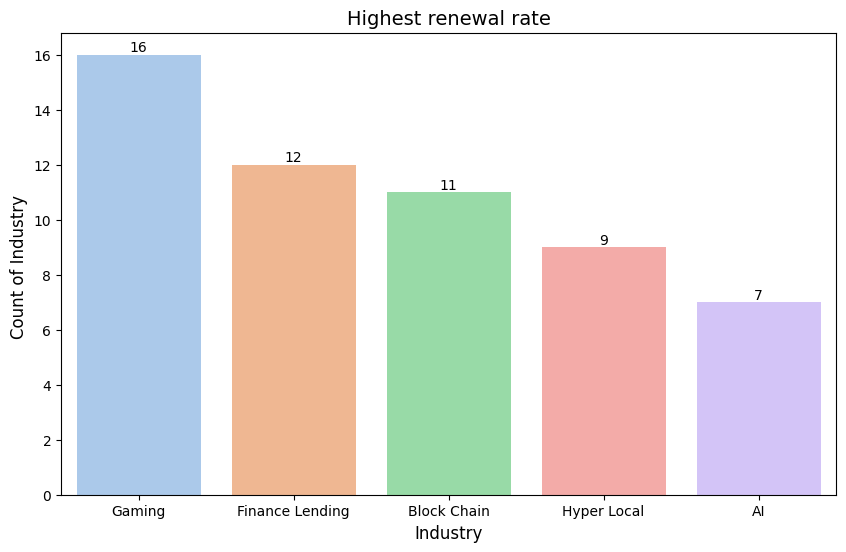

In [123]:
## Assigning the size of the image for standardizing same size of the image
plt.figure(figsize=(10, 6))

## Filtering the dataframe 'df_merge' to include only rows where the 'renewed' column is True This gives us all the subscriptions that have been renewed
renewed_subscriptions = df_merge[df_merge['renewed'] == True]

## Getting the count of each unique value in the 'industry' column for the renewed subscriptions This tells us how many renewed subscriptions belong to each industry
Highest_renewal_rate_count = renewed_subscriptions['industry'].value_counts()

## Creating a bar plot using Seaborn
Highest_renewal_rate_plot = sns.barplot(x = Highest_renewal_rate_count.index, y = Highest_renewal_rate_count.values, palette= 'pastel')

## Looping through the containers (bars) in the plot and add labels on top of each bar The 'bar_label' method adds the value labels, displaying the client count on top of each bar
for container in Highest_renewal_rate_plot.containers:
  Highest_renewal_rate_plot.bar_label(container, fontsize=10)

## Adding titles and labels
plt.title('Highest renewal rate', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Count of Industry ', fontsize=12)

## Displaying plot
plt.show()

### 4. What is the median amount paid each year for all payment methods?

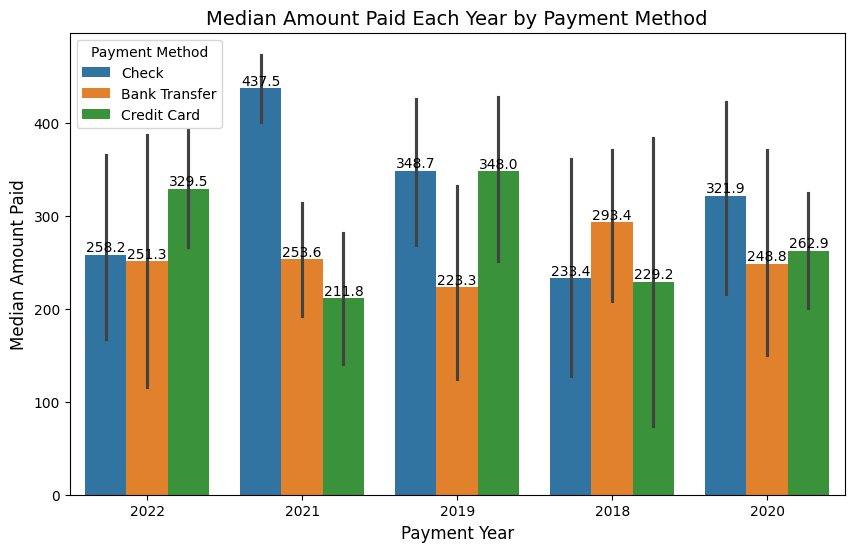

In [124]:
## Assigning the size of the image for standardizing same size of the image
plt.figure(figsize=(10, 6))

## Creating a bar plot using Seaborn
amount_paid_each_year_all_payment_plot = sns.barplot(data = df_merge, x='payment_year', y='amount_paid', hue='payment_method')

## Looping through each set of bars (containers) in the plot to add labels on top of themThe 'bar_label' method adds a label showing the amount for each bar'labels' argument formats the labels to show rounded values (1 decimal place)
for container in amount_paid_each_year_all_payment_plot.containers:
  amount_paid_each_year_all_payment_plot.bar_label(container,
                                                    labels=[f'{round(val, 1)}' for val in container.datavalues],
                                                    fontsize=10)

## Adding titles and labels
plt.title('Median Amount Paid Each Year by Payment Method', fontsize=14)
plt.xlabel('Payment Year', fontsize=12)
plt.ylabel('Median Amount Paid', fontsize=12)
plt.legend(title='Payment Method')

# Displaying plot
plt.show()

### 3. What was the average inflation rate when their subscriptions were renewed?

In [125]:
## Creating an empty list to store the inflation rates corresponding to each renewed subscription
inflation_rates = []

## Looping through each row in the 'renewed_subscriptions' DataFrameWe use iterrows() to iterate over each row by index and row data
for index, row in renewed_subscriptions.iterrows():

## Extract the 'payment_date' for the current subscription
    payment_date = row['payment_date']

## Finding the relevant inflation data by filtering the 'df_merge' DataFrame We're looking for inflation data that corresponds to the time period that includes the 'payment_date'The inflation rate period is defined between 'start_date' and 'end_date'
    relevant_inflation = df_merge[(df_merge['start_date'] <= payment_date) &
                                  (df_merge['end_date'] >= payment_date)]

## If there is any inflation data found for the period, append the inflation rate to the list We take the inflation rate from 'df_financial', assuming the first value is the correct one
    if not relevant_inflation.empty:
        inflation_rates.append(df_financial['inflation_rate'].values[0])

## Calculating the average inflation rate for the renewed subscriptions We sum all the inflation rates and divide by the number of rates, but only if the list is not empty
average_inflation_rate = sum(inflation_rates) / len(inflation_rates) if inflation_rates else 0

## Printing the average inflation rate when subscriptions were renewed in the desired format
print("Average inflation rate when subscriptions were renewed: ", round(average_inflation_rate, 2), "%")



Average inflation rate when subscriptions were renewed:  5.77 %
